In [1]:
import numpy as np
import pandas as pd

In [2]:
header = ['user_id', 'item_id', 'rating', 'timestamp']
dataset = pd.read_csv('data/ratings_Digital_Music.csv', names=header)

In [3]:
dataset.head()

,user_id,item_id,rating,timestamp
0,A2EFCYXHNK06IS,5555991584,5.0,978480000
1,A1WR23ER5HMAA9,5555991584,5.0,953424000
2,A2IR4Q0GPAFJKW,5555991584,4.0,1393545600
3,A2V0KUVAB9HSYO,5555991584,4.0,966124800
4,A1J0GL9HCA7ELW,5555991584,5.0,1007683200


In [4]:
df = dataset.head(10000)

In [5]:
n_users = df.user_id.unique().shape[0]
n_items = df.item_id.unique().shape[0]
print ('Number of users = ' , str(n_users) , ' | Number of movies = ' , str(n_items))

Number of users =  8355  | Number of movies =  500


In [6]:
from sklearn import cross_validation as cv
train_data, test_data = cv.train_test_split(df, test_size=0.25)

/home/mauli/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
sns.set_style('white')

In [9]:
df.groupby('item_id')['rating'].mean().sort_values(ascending=False).head(10)

item_id
B00000027R    5.0
B000000YNA    5.0
B0000002VC    5.0
B000000EYE    5.0
B000000EYL    5.0
B0000002V5    5.0
B000000EYM    5.0
B000000EYT    5.0
B000000OIH    5.0
B0000002LZ    5.0
Name: rating, dtype: float64

In [10]:
df.groupby('item_id')['rating'].count().sort_values(ascending=False).head(10)

item_id
B00000016W    600
B00000064G    276
B000000TDH    219
B000000OUJ    195
B00000053X    162
B000000WCV    149
5555991584    130
B0000002ME    129
B00000016T    121
B000000WZ4    119
Name: rating, dtype: int64

In [11]:
ratings =pd.DataFrame(df.groupby('item_id')['rating'].mean())

In [12]:
ratings.head()

,rating
item_id,
5555991584,4.638462
6308051551,5.000000
7901622466,4.823529
B0000000ZW,4.333333
B00000016T,4.719008


In [13]:
ratings['rating_numbers'] = pd.DataFrame(df.groupby('item_id')['rating'].count())

In [14]:
ratings.head()

,rating,rating_numbers
item_id,,
5555991584,4.638462,130
6308051551,5.000000,2
7901622466,4.823529,17
B0000000ZW,4.333333,21
B00000016T,4.719008,121


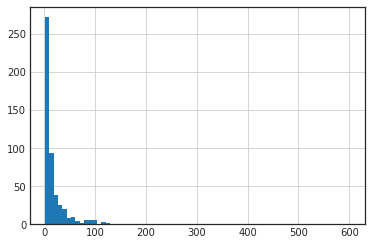

In [15]:
ratings['rating_numbers'].hist(bins=70)

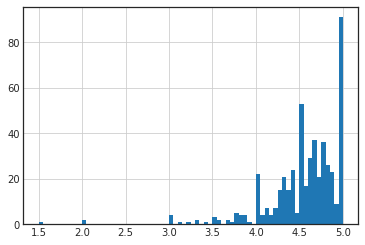

In [16]:
ratings['rating'].hist(bins=70)

/home/mauli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/mauli/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


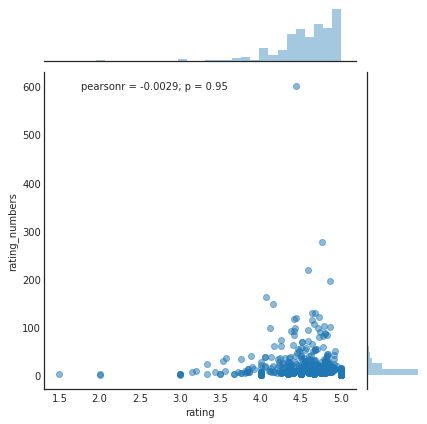

In [17]:
sns.jointplot(x='rating', y='rating_numbers', data=ratings, alpha=0.5)

In [18]:
moviemat = df.pivot_table(index='user_id', columns='item_id', values='rating')
moviemat.head()

item_id,5555991584,6308051551,7901622466,B0000000ZW,B00000016T,B00000016W,B00000017R,B0000001BA,B0000001BO,B0000001O0,...,B0000011CU,B0000011GU,B0000011MD,B0000011N5,B0000011P7,B0000011WE,B0000011X5,B0000011XM,B00000127G,B0000012T3
user_id,,,,,,,,,,,,,,,,,,,,,
A04345582HHNXEA9SAET4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A07465992K7FVSL53VA9B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A08161909WK3HU7UYTMW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A086594320Z777EHOFWKU,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A10175AMUHOQC4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
ratings.sort_values('rating_numbers', ascending=False).head(10)

,rating,rating_numbers
item_id,,
B00000016W,4.433333,600
B00000064G,4.760870,276
B000000TDH,4.584475,219
B000000OUJ,4.866667,195
B00000053X,4.067901,162
B000000WCV,4.147651,149
5555991584,4.638462,130
B0000002ME,4.674419,129
B00000016T,4.719008,121


In [20]:
B00000016W_user_ratings = moviemat['B00000016W']
B00000016T_user_ratings =moviemat['B00000016T']

In [21]:
B00000016W_user_ratings.head()

user_id
A04345582HHNXEA9SAET4   NaN
A07465992K7FVSL53VA9B   NaN
A08161909WK3HU7UYTMW    NaN
A086594320Z777EHOFWKU   NaN
A10175AMUHOQC4          NaN
Name: B00000016W, dtype: float64

In [22]:
similar_to_B00000016W = moviemat.corrwith(B00000016W_user_ratings)
similar_to_B00000016W.head()

/home/mauli/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/mauli/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


item_id
5555991584   NaN
6308051551   NaN
7901622466   NaN
B0000000ZW   NaN
B00000016T   NaN
dtype: float64

In [23]:
similar_to_B00000016T = moviemat.corrwith(B00000016T_user_ratings)
similar_to_B00000016T.head()

/home/mauli/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/home/mauli/.local/lib/python3.6/site-packages/numpy/lib/function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


item_id
5555991584    NaN
6308051551    NaN
7901622466    NaN
B0000000ZW    NaN
B00000016T    1.0
dtype: float64

In [24]:
corr_B00000016W = pd.DataFrame(similar_to_B00000016W, columns=['Correlation'])
corr_B00000016W.dropna(inplace=True)

In [25]:
corr_B00000016W.head()

,Correlation
item_id,
B00000016W,1.000000
B00000017R,1.000000
B0000002ME,-0.333333
B00000053B,-1.000000
B00000064E,0.612372


In [26]:
corr_B00000016W.sort_values('Correlation', ascending=False).head(10)

,Correlation
item_id,
B00000016W,1.000000
B000000OPC,1.000000
B000000OME,1.000000
B000000I0D,1.000000
B000000YDT,1.000000
B000000ZHD,1.000000
B000000W6X,1.000000
B00000017R,1.000000
B000000OMB,0.800000


In [27]:
corr_B00000016W = corr_B00000016W.join(ratings['rating_numbers'], how='left', lsuffix='_left', rsuffix='_right')
corr_B00000016W.head()

,Correlation,rating_numbers
item_id,,
B00000016W,1.000000,600
B00000017R,1.000000,82
B0000002ME,-0.333333,129
B00000053B,-1.000000,58
B00000064E,0.612372,107


In [28]:
corr_B00000016W[corr_B00000016W['rating_numbers']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_numbers
item_id,,
B00000016W,1.000000,600
B000000OMB,0.800000,117
B000000TDH,0.771744,219
B00000064E,0.612372,107
B00000064G,-0.207436,276


In [29]:
corr_B00000016T = pd.DataFrame(similar_to_B00000016T, columns=['Correlation'])
corr_B00000016T.dropna(inplace=True)

In [30]:
corr_B00000016T.head()

,Correlation
item_id,
B00000016T,1.000000
B0000009UT,0.408248
B0000009UW,-0.500000
B000000WGN,1.000000


In [31]:
corr_B00000016T = corr_B00000016T.join(ratings['rating_numbers'], how='left')
corr_B00000016T.head()

,Correlation,rating_numbers
item_id,,
B00000016T,1.000000,121
B0000009UT,0.408248,55
B0000009UW,-0.500000,33
B000000WGN,1.000000,86


In [32]:
corr_B00000016T[corr_B00000016T['rating_numbers']>100].sort_values('Correlation', ascending=False).head()

,Correlation,rating_numbers
item_id,,
B00000016T,1.0,121
